In [1]:

import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
from PIL import Image
import pandas as pd
from gensim.models import Phrases
from gensim.models import Word2Vec
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from gensim.scripts import word2vec2tensor
from itertools import combinations

In [2]:
# Get the training corpus for bigram model
texts = []
textnames = []
folder = '/srv/data/targetCorpusSTOP'
for file in os.listdir(folder):
    path = os.path.join(folder,file)
    f = open(path,'r')
    data = f.readlines()[0]
    texts.append(data)
    name = file.split('.')[0]
    textnames.append(name)
    f.close()

# list of lists of strings, each text broken up into individual token strings
tokenized = []
for text in texts:
    words = []
    text = text.split(' ')
    for t in text:
        if len(t) != 0:
            words.append(t)
    tokenized.append(words)


In [3]:
# Create bigram model based on training corpus
bigrammodel = Phrases(tokenized, min_count = 3, threshold=20)

In [4]:
test_textnames = ['A00601', 'A01027', 'A06967', 'A00793', 'A02702', 'A03497', 'A07855', 'A07512', 'A05169', 'A02487', 'A09036', 'A04407', 'A00797', 'A08591', 'A01379', 'A01524', 'A01975', 'A02589', 'A04796', 'A02597', 'A01970', 'A08210', 'A02253', 'A01346', 'A06268', 'A08282', 'A07809', 'A02532', 'A00587', 'A00599', 'A00260', 'A04836', 'A00927', 'A02414', 'A16264', 'A12455', 'A11227', 'A18093', 'A10194', 'A17864', 'A18298', 'A14292', 'A16743', 'A16944', 'A11051', 'A11058', 'A11795', 'A11193', 'A17973', 'A10078', 'A17306', 'A17412', 'A11078', 'A16338', 'A21195', 'A20650', 'A20002', 'A20126', 'A22418', 'A68702', 'A69028', 'A68256', 'A68203', 'B05762', 'A04657', 'A03495', 'A00296', 'A00683', 'A09287', 'A07776', 'A00756', 'A04124', 'A04622', 'A06374', 'A00581', 'A00600', 'A00297', 'A03494', 'A09218', 'A07213', 'A07207', 'A03455', 'A03693', 'A11372', 'A10231', 'A12573', 'A19189', 'A17444', 'A10515', 'A13267', 'A19255', 'A13178', 'A12160', 'A17731', 'A11520', 'A12600', 'A13262', 'A18976', 'A15734', 'A16154', 'A13268', 'A10135', 'A22417', 'A22409', 'A22423', 'A22419', 'A22415', 'A22743', 'A22427', 'A22401', 'A22413', 'A22425', 'A22429', 'A22408', 'A22416', 'A20641', 'A20161', 'A22404', 'A22420', 'A22406', 'A23586', 'A22426', 'A22410', 'A22424', 'A22428', 'A22400', 'A22412', 'A68255', 'A72827', 'A73921', 'A73186', 'A73981', 'A73983', 'B01253', 'B07590', 'B01109', 'B01191', 'B07910', 'B00620', 'B07663', 'B00476', 'B07413', 'B01215', 'B12292', 'B11942', 'B12929', 'B12923', 'B13495', 'A03730', 'A03057', 'A08939', 'A07541', 'A03092', 'A00214', 'A05597', 'A05589', 'A06398', 'A02755', 'A01750', 'A08346', 'A00089', 'A00967', 'A08813', 'A02454', 'A07160', 'A04907', 'A01210', 'A06826', 'A02769', 'A00011', 'A06795', 'A04155', 'A00959', 'A04585', 'A02262', 'A04651', 'A07979', 'A00926', 'A08628', 'A02000', 'A03429', 'A00695', 'A03188', 'A03196', 'A04417', 'A06731', 'A03797', 'A07540', 'A09216', 'A08945', 'A02199', 'A05465', 'A09304', 'A08973', 'A03752', 'A00289', 'A00749', 'A01531', 'A01344', 'A00395', 'A06472', 'A00966', 'A02455', 'A03733', 'A07970', 'A03845', 'A01779', 'A01059', 'A01775', 'A08990', 'A04838', 'A02990', 'A08975', 'A07673', 'A02520', 'A06794', 'A01989', 'A05590', 'A06393', 'A08984', 'A02605', 'A01773', 'A00293', 'A01084', 'A02453', 'A08637', 'A08953', 'A13054', 'A15689', 'A12308', 'A13795', 'A11667', 'A19762', 'A16923', 'A19009', 'A18334', 'A17248', 'A15013', 'A11669', 'A13516', 'A12133', 'A16537', 'A13144', 'A17047', 'A14590', 'A10663', 'A13752', 'A18054', 'A19160', 'A15670', 'A10190', 'A15725', 'A12202', 'A17289', 'A19347', 'A11242', 'A13123', 'A14290', 'A11378', 'A13017', 'A10495', 'A11276', 'A11527', 'A19880', 'A19750', 'A12148', 'A16927', 'A11663', 'A12598', 'A11864', 'A13438', 'A12817', 'A10279', 'A12130', 'A15606', 'A12141', 'A11674', 'A14556', 'A13393', 'A15325', 'A13128', 'A17961', 'A13010', 'A17129', 'A10822', 'A16316', 'A18272', 'A16168', 'A12143', 'A19006', 'A12151', 'A12327', 'A13395', 'A12182', 'A16685', 'A15364', 'A18051', 'A13014', 'A11662', 'A13985', 'A12145', 'A18374', 'A16650', 'A12034', 'A12149', 'A11214', 'A22757', 'A20735', 'A29561', 'A33309', 'A36390', 'A47405', 'A63867', 'A68783', 'A64185', 'A67870', 'A69024', 'A65649', 'A68655', 'A72872', 'A72190', 'A89602', 'B00046', 'B00113', 'B04597', 'B00127', 'B00363', 'B00199', 'B00112', 'B00028', 'B00433', 'B05886', 'B00511', 'A03599', 'A03346', 'A09289', 'A04831', 'A03960', 'A01914', 'A01637', 'A03966', 'A02260', 'A05952', 'A06160', 'A04986', 'A02629', 'A03516', 'A03347', 'A00747', 'A01891', 'A04977', 'A03609', 'A02119', 'A04365', 'A04984', 'A00765', 'A02259', 'A04418', 'A02139', 'A09011', 'A06161', 'A06718', 'A09607', 'A07397', 'A03735', 'A03603', 'A00643', 'A11608', 'A11675', 'A19703', 'A10985', 'A11846', 'A15695', 'A11850', 'A13216', 'A11673', 'A13019', 'A19451', 'A14721', 'A10126', 'A13005', 'A16830', 'A11183', 'A11530', 'A10214', 'A11664', 'A11459', 'A13022', 'A11672', 'A12751', 'A12102', 'A11670', 'A17524', 'A16210', 'A11187', 'A20863', 'A20955', 'A23077', 'A22651', 'A20637', 'A22647', 'A22650', 'A20468', 'A22642', 'A21069', 'A22646', 'A21192', 'A20966', 'A36404', 'A69070', 'A68103', 'A69365', 'A61095', 'A62405', 'A69163', 'A66021', 'A69143', 'A73546', 'A73702', 'A73761', 'A72796', 'A73885', 'A72989', 'A72146', 'A72828', 'A74609', 'A73930', 'A73261', 'A72820', 'A73721', 'A73037', 'A83529', 'A97361', 'B07988', 'B00666', 'B00146', 'B00170', 'B00731', 'B07986', 'B07998', 'B00516', 'B00582', 'B00386', 'B08057', 'B09120', 'B00243', 'B00222', 'B07802', 'B07666', 'B03599', 'B00767', 'B08042', 'B03447', 'B06732', 'B07634', 'B00391', 'B08812', 'B07962', 'B00624', 'B00535', 'B13178', 'B14804', 'B13588', 'B12283', 'B15647', 'B13858', 'A06243', 'A02427', 'A04626', 'A09274', 'A02352', 'A03149', 'A04209', 'A04340', 'A06746', 'A01857', 'A06241', 'A05421', 'A06253', 'A04840', 'A04104', 'A07498', 'A01877', 'A04339', 'A08274', 'A09523', 'A04775', 'A07639', 'A05560', 'A06797', 'A08331', 'A01804', 'A01932', 'A09599', 'A05170', 'A09286', 'A04735', 'A04076', 'A06242', 'A03154', 'A04166', 'A02739', 'A00321', 'A06964', 'A03469', 'A08967', 'A00002', 'A04191', 'A07792', 'A01389', 'A04795', 'A01612', 'A05168', 'A01043', 'A04347', 'A06937', 'A03204', 'A01470', 'A04498', 'A04652', 'A08625', 'A15504', 'A17409', 'A13451', 'A19204', 'A13127', 'A15453', 'A11229', 'A19148', 'A13994', 'A18042', 'A10839', 'A11511', 'A17874', 'A17014', 'A14249', 'A16629', 'A19581', 'A16822', 'A13468', 'A13540', 'A19771', 'A18354', 'A13171', 'A19242', 'A11689', 'A19909', 'A11715', 'A10834', 'A10129', 'A19409', 'A19246', 'A17042', 'A17500', 'A19604', 'A13448', 'A12599', 'A10551', 'A17772', 'A17808', 'A22362', 'A22370', 'A22358', 'A22354', 'A22337', 'A22340', 'A22368', 'A22376', 'A22655', 'A22385', 'A22389', 'A22395', 'A22350', 'A22378', 'A22363', 'A20618', 'A20509', 'A20080', 'A22349', 'A22365', 'A22377', 'A20004', 'A22367', 'A20491', 'A22394', 'A20513', 'A68617', 'A68193', 'A68936', 'A68143', 'A68937', 'A68038', 'A68474', 'A72798', 'A71306', 'A71305', 'A72857', 'A71307', 'A72865', 'B00859', 'B00779', 'B00024', 'B00491', 'A01420', 'A08112', 'A03080', 'A04374', 'A06875', 'A01934', 'A07200', 'A03698', 'A06265', 'A00951', 'A03427', 'A01814', 'A07994', 'A05221', 'A05342', 'A04767', 'A05350', 'A08151', 'A07538', 'A08439', 'A08535', 'A07344', 'A04220', 'A09559', 'A07061', 'A03674', 'A05689', 'A06098', 'A03930', 'A04961', 'A00466', 'A08314', 'A05288', 'A07556', 'A06254', 'A05534', 'A04390', 'A17913', 'A18475', 'A19613', 'A13469', 'A11720', 'A17270', 'A19758', 'A14197', 'A19644', 'A17589', 'A12095', 'A18961', 'A13640', 'A10132', 'A14648', 'A13060', 'A13631', 'A10698', 'A19586', 'A19290', 'A19355', 'A15369', 'A10047', 'A15502', 'A18603', 'A10134', 'A11621', 'A17271', 'A10875', 'A11408', 'A13325', 'A14278', 'A19399', 'A18468', 'A19262', 'A15387', 'A13560', 'A15602', 'A11377', 'A12213', 'A22391', 'A20390', 'A22346', 'A21197', 'A22372', 'A20766', 'A22335', 'A20642', 'A22344', 'A22393', 'A22381', 'A22364', 'A22387', 'A22342', 'A22359', 'A22355', 'A22371', 'A22382', 'A22390', 'A22392', 'A22380', 'A22345', 'A22388', 'A22396', 'A22341', 'A22353', 'A22375', 'A22343', 'A22386', 'A22590', 'A68637', 'A68162', 'A68126', 'A69352', 'A73188', 'A72839', 'A73106', 'A73069', 'A73831', 'A72217', 'A73848', 'A72397', 'A73045', 'A73829', 'A73979', 'A72799', 'A73189', 'A73187', 'A73183', 'A73170', 'A73778', 'A72783', 'B00373', 'B07402', 'B01251', 'B00963', 'B01249', 'B07973', 'B01250', 'B07702', 'B01252', 'B01080', 'B11307', 'B12892', 'B12908', 'B12894', 'B12903', 'B13665', 'B14194', 'B12909', 'A06471', 'A02151', 'A03190', 'A00459', 'A03235', 'A01902', 'A06288', 'A09194', 'A02057', 'A09531', 'A03141', 'A09958', 'A07239', 'A02087', 'A08062', 'A03111', 'A03146', 'A02275', 'A00761', 'A00233', 'A01935', 'A03253', 'A09674', 'A05115', 'A00519', 'A06291', 'A10065', 'A17587', 'A10657', 'A10130', 'A10378', 'A16817', 'A11901', 'A17344', 'A16745', 'A10179', 'A10552', 'A10256', 'A17771', 'A11278', 'A19338', 'A11435', 'A19070', 'A18367', 'A18304', 'A19678', 'A17300', 'A10189', 'A13423', 'A12205', 'A17586', 'A16216', 'A18244', 'A15848', 'A13983', 'A19883', 'A14929', 'A10191', 'A19034', 'A11762', 'A13511', 'A13460', 'A11434', 'A12313', 'A17298', 'A20093', 'A20965', 'A22663', 'A22610', 'A20858', 'A20364', 'A69228', 'A68614', 'B00502', 'A09899', 'A07567', 'A09897', 'A07920', 'A09564', 'A00607', 'A04956', 'A01898', 'A05439', 'A09813', 'A08319', 'A00593', 'A08586', 'A08668', 'A07145', 'A09646', 'A02804', 'A07362', 'A08482', 'A00272', 'A11881', 'A19884', 'A11360', 'A16628', 'A10268', 'A10507', 'A15510', 'A17079', 'A18436', 'A17342', 'A17475', 'A10603', 'A17044', 'A19987', 'A16286', 'A12698', 'A17140', 'A22606', 'A22604', 'A21060', 'A22602', 'A22609', 'A22605', 'A21157', 'A22603', 'A68609', 'A69235', 'A68989', 'A68868', 'A68047', 'A73472', 'A72513', 'A73149', 'A73793', 'A73459', 'A72375', 'A72251', 'A73382', 'B01076', 'B00579', 'B01127', 'B08159', 'B00626', 'B11858', 'A08956', 'A00737', 'A01586', 'A09645', 'A00510', 'A04692', 'A05751', 'A03239', 'A01025', 'A02680', 'A07607', 'A08958', 'A02413', 'A04919', 'A03207', 'A01996', 'A00586', 'A02519', 'A07526', 'A08456', 'A03200', 'A08949', 'A09500', 'A04168', 'A07595', 'A08955', 'A07614', 'A07165', 'A08943', 'A08455', 'A01108', 'A04569', 'A07333', 'A00478', 'A01868', 'A00211', 'A07439', 'A03343', 'A00235', 'A00028', 'A08969', 'A04619', 'A15631', 'A16663', 'A19005', 'A12816', 'A13990', 'A18345', 'A18695', 'A12099', 'A15469', 'A16342', 'A15699', 'A12154', 'A16946', 'A16161', 'A19003', 'A16829', 'A12125', 'A13482', 'A12245', 'A19882', 'A17593', 'A19212', 'A10071', 'A19890', 'A17581', 'A17866', 'A11460', 'A10829', 'A19001', 'A16827', 'A16903', 'A13839', 'A19231', 'A19196', 'A17292', 'A18028', 'A12198', 'A19558', 'A16648', 'A12815', 'A13421', 'A17737', 'A13217', 'A16156', 'A13529', 'A15842', 'A13790', 'A18429', 'A19000', 'A10668', 'A15792', 'A20414', 'A20514', 'A22597', 'A20729', 'A20512', 'A20379', 'A20119', 'A20386', 'A23279', 'A20381', 
            'A20511', 'A20987', 'A68805', 'A72221', 'A97312', 'B00245', 'B00115', 'B00047', 'B00464', 'B00405', 'B00045', 'B00157', 'B00503', 'A08552', 'A07208', 'A04604', 'A03104', 'A05217', 'A09405', 'A06676', 'A03096', 'A00503', 'A00989', 'A09275', 'A08826', 'A08873', 'A08810', 'A06264', 'A05193', 'A00184', 'A01743', 'A07610', 'A09441', 'A04774', 'A04125', 'A04083', 'A07964', 'A04959', 'A01374', 'A13210', 'A16852', 'A16387', 'A11741', 'A10319', 'A19886', 'A11205', 'A11252', 'A14778', 'A19695', 'A14261', 'A16803', 'A10225', 'A10559', 'A10243', 'A13632', 'A13073', 'A11812', 'A16543', 'A18462', 'A10508', 'A11549', 'A13747', 'A22587', 'A22608', 'A20770', 'A22593', 'A22591', 'A20986', 'A22586', 'A20983', 'A22588', 'A21059', 'A68830', 'A60431', 'A72993', 'A72794', 'A73153', 'A73391', 'A72527', 'B00873', 'B00101', 'B00586', 'B07424', 'B01150', 'B00140', 'B01125', 'B00526', 'B08163', 'B07633', 'B00732', 'B01118', 'B00423', 'B00587', 'B00525', 'B01071', 'B00570', 'B01090', 'B00600', 'B00655', 'B13095', 'B11749', 'B12174', 'B11293', 'B16060', 'B15755', 'A04909', 'A01011', 'A00426', 'A09626', 'A01776', 'A01139', 'A01849', 'A07543', 'A03415', 'A05161', 'A01158', 'A06402', 'A01234', 'A08829', 'A01980', 'A02741', 'A07332', 'A07367', 'A01253', 'A07711', 'A09201', 'A02327', 'A07330', 'A01052', 'A01772', 'A03233', 'A01777', 'A09967', 'A07248', 'A01937', 'A09197', 'A07542', 'A02324', 'A00958', 'A07537', 'A06911', 'A09707', 'A09971', 'A01342', 'A08965', 'A07819', 'A02518', 'A06688', 'A19888', 'A13484', 'A11519', 'A13422', 'A12168', 'A13699', 'A18083', 'A12166', 'A10790', 'A15873', 'A12087', 'A10819', 'A13471', 'A16110', 'A10235', 'A12183', 'A19569', 'A18164', 'A18943', 'A11116', 'A11659', 'A13461', 'A11385', 'A19755', 'A10267', 'A12177', 'A11766', 'A11380', 'A12209', 'A12184', 'A16536', 'A10066', 'A16204', 'A11764', 'A12167', 'A17914', 'A14722', 'A18427', 'A13439', 'A12180', 'A11241', 'A19568', 'A17286', 'A22634', 'A22830', 'A20724', 'A69129', 'A68707', 'A68712', 'A05344', 'A05464', 'A06304', 'A00187', 'A08677', 'A08149', 'A05466', 'A06674', 'A07320', 'A08636', 'A02675', 'A01010', 'A05345', 'A07149', 'A01235', 'A08812', 'A08148', 'A01632', 'A04101', 'A00291', 'A00173', 'A09013', 'A08998', 'A02060', 'A09740', 'A10966', 'A17474', 'A15847', 'A15139', 'A17883', 'A15484', 'A19611', 'A15795', 'A11833', 'A11610', 'A19328', 'A13851', 'A11368', 'A11845', 'A15862', 'A10232', 'A14923', 'A15684', 'A10384', 'A11719', 'A12190', 'A14262', 'A11656', 'A10795', 'A11654', 'A19372', 'A25501', 'A20992', 'A21054', 'A35228', 'A69044', 'A68588', 'A68795', 'A68312', 'A68615', 'A68624', 'A73285', 'A72333', 'A73033', 'A73284', 'A73324', 'B00247', 'B01091', 'B00272', 'B01136', 'B12027', 'B12363', 'B13574', 'A04874', 'A07361', 'A01936', 'A01039', 'A07971', 'A09207', 'A00475', 'A07536', 'A05287', 'A08780', 'A06453', 'A01547', 'A01089', 'A04599', 'A08976', 'A05581', 'A09970', 'A04192', 'A03242', 'A01648', 'A01038', 'A03420', 'A01049', 'A03255', 'A01653', 'A08787', 'A09208', 'A02322', 'A01433', 'A03924', 'A07381', 'A08025', 'A08731', 'A09984', 'A05172', 'A02744', 'A03210', 'A07978', 'A02148', 'A03402', 'A01647', 'A01759', 'A09605', 'A01645', 'A03379', 'A02170', 'A04824', 'A07976', 'A00604', 'A07385', 'A01454', 'A05322', 'A01446', 'A16315', 'A13125', 'A12085', 'A12185', 'A10821', 'A13414', 'A13477', 'A11706', 'A15845', 'A13789', 'A10411', 'A12150', 'A10655', 'A19681', 'A17585', 'A12187', 'A16680', 'A10389', 'A11474', 'A11745', 'A16622', 'A12170', 'A11710', 'A10327', 'A19479', 'A12210', 'A12191', 'A18109', 'A17736', 'A13492', 'A12181', 'A12127', 'A11655', 'A13502', 'A12135', 'A16651', 'A16675', 'A19008', 'A18370', 'A11742', 'A10512', 'A13497', 'A10015', 'A10820', 'A19889', 'A12186', 'A12194', 'A11072', 'A11752', 'A11707', 'A10510', 'A19878', 'A17074', 'A14653', 'A10380', 'A14442', 'A11386', 'A11152', 'A13429', 'A14258', 'A14203', 'A13376', 'A16857', 'A15866', 'A11746', 'A10263', 'A10652', 'A18610', 'A22622', 'A20926', 'A20892', 'A20388', 'A21103', 'A21158', 'A20820', 'A20714', 'A22598', 'A20440', 'A69202', 'A68467', 'A68114', 'A68968', 'A72576', 'A72015', 'A72189', 'A73800', 'A08047', 'A07857', 'A03614', 'A08944', 'A01900', 'A03604', 'A01005', 'A03600', 'A05460', 'A08143', 'A08799', 'A03615', 'A08054', 'A02445', 'A03678', 'A05467', 'A03617', 'A00250', 'A02639', 'A03066', 'A05459', 'A06360', 'A08318', 'A07915', 'A15363', 'A17026', 'A10209', 'A11743', 'A11718', 'A18257', 'A16491', 'A10311', 'A11761', 'A16313', 'A13152', 'A11175', 'A15052', 'A11736', 'A18243', 'A10908', 'A15509', 'A11740', 'A17541', 'A19610', 'A15319', 'A19614', 'A13317', 'A11760', 'A11603', 'A11744', 'A10081', 'A11725', 'A17735', 'A22632', 'A20672', 'A20495', 'A20507', 'A20215', 'A20231', 'A22629', 'A68015', 'A68105', 'A68713', 'A68543', 'A68450', 'A72331', 'A72376', 'A72216', 'A73631', 'B08186', 'B07654', 'B01135', 'B01255', 'B00568', 'B00698', 'B00049', 'B00385', 'B14293', 'B11637', 'B12278', 'A04661', 'A05604', 'A03192', 'A06744', 'A04895', 'A02878', 'A03248', 'A04167', 'A00816', 'A03136', 'A09811', 'A07555', 'A08987', 'A07832', 'A07975', 'A01894', 'A03030', 'A07384', 'A01760', 'A03139', 'A05418', 'A06782', 'A04306', 'A01872', 'A07788', 'A07974', 'A05555', 'A08804', 'A03230', 'A03241', 'A05611', 'A02586', 'A05601', 'A03251', 'A00960', 'A08941', 'A07628', 'A11082', 'A16823', 'A19646', 'A12140', 'A10198', 'A12178', 'A12142', 'A10368', 'A19648', 'A17452', 'A12137', 'A18369', 'A12158', 'A19011', 'A19707', 'A16337', 'A17385', 'A14345', 'A19674', 'A10197', 'A14439', 'A13431', 'A13777', 'A17453', 'A19974', 'A13442', 'A12203', 'A12360', 'A19346', 'A12136', 'A10687', 'A10255', 'A11384', 'A17832', 'A20982', 'A23301', 'A20788', 'A20786', 'A20118', 'A68174', 'A68902', 'A68733', 'A68870', 'A73992', 'A03409', 'A05962', 'A09055', 'A03897', 'A05165', 'A01284', 'A04128', 'A03610', 'A09057', 'A05633', 'A04379', 'A03605', 'A05347', 'A01248', 'A04754', 'A00529', 'A02982', 'A06732', 'A08457', 'A00679', 'A07831', 'A13280', 'A15828', 'A17442', 'A15137', 'A12814', 'A12977', 'A13282', 'A17472', 'A18711', 'A10606', 'A16564', 'A18500', 'A13526', 'A15068', 'A13211', 'A15010', 'A13272', 'A13872', 'A12215', 'A18489', 'A19692', 'A19065', 'A12952', 'A15012', 'A14374', 'A14599', 'A17473', 'A11920', 'A11176', 'A12696', 'A22618', 'A22616', 'A20688', 'A69012', 'A72036', 'A73399', 'A73993', 'A73533', 'A73301', 'A72143', 'A73908', 'A97352', 'B01119', 'B07687', 'B08155', 'B00055', 'B08236', 'B00106', 'B00008', 'B00240', 'B13133', 'B14070', 'B11899', 'A02549', 'A15348', 'A25833', 'A27500', 'A29667', 'A29239', 'A25413', 'A28043', 'A28663', 'A28264', 'A29665', 'A29558', 'A25798', 'A27469', 'A27349', 'A27257', 'A29831', 'A27982', 'A28270', 'A29223', 'A27156', 'A28665', 'A29892', 'A26468', 'A29238', 'A25739', 'A29617', 'A28085', 'A27511', 'A28269', 'A29731', 'A28178', 'A26417', 'A29508', 'A28662', 'A25280', 'A29832', 'A27155', 'A29512', 'A29365', 'A27487', 'A29654', 'A35853', 'A36391', 'A33528', 'A34504', 'A32054', 'A36846', 'A38783', 'A32137', 'A34516', 'A36495', 'A38984', 'A32125', 'A32992', 'A37285', 'A30641', 'A32955', 'A37899', 'A35711', 'A34477', 'A38308', 'A30262', 'A39222', 'A30295', 'A33357', 'A33234', 'A33238', 'A32820', 'A37578', 'A32754', 'A30503', 'A32009', 'A32109', 'A34793', 'A39967', 'A37190', 'A39243', 'A37055', 'A33486', 'A32888', 'A33135', 'A34152', 'A31983', 'A33390', 'A34672', 'A35569', 'A30705', 'A32786', 'A34722', 'A34595', 'A30070', 'A36520', 'A31681', 'A32136', 'A39599', 'A39925', 'A32124', 'A36494', 'A39937', 'A32856', 'A32012', 'A35736', 'A36912', 'A37461', 'A35728', 'A37793', 'A39935', 'A38205', 'A37251', 'A34431', 'A37463', 'A31762', 'A33368', 'A32110', 'A32784', 'A38817', 'A38702', 'A39798', 'A30640', 'A37176', 'A30594', 'A38409', 'A36121', 'A37224', 'A35730', 'A37882', 'A36830', 'A30644', 'A34593', 'A31514', 'A36279', 'A33718', 'A32323', 'A30646', 'A34726', 'A33061', 'A34205', 'A39966', 'A34899', 'A30573', 'A34513', 'A38203', 'A41983', 'A44967', 'A45183', 'A41891', 'A49267', 'A46266', 'A43598', 'A42725', 'A49711', 'A42758', 'A44208', 'A46878', 'A45750', 'A47407', 'A44204', 'A43336', 'A47698', 'A47694', 'A48273', 'A41124', 'A47688', 'A47696', 'A41100', 'A40995', 'A41485', 'A44199', 'A43605', 'A42351', 'A48594', 'A40878', 'A43488', 'A48681', 'A41671', 'A40409', 'A43314', 'A44202', 'A41285', 'A45648', 'A45320', 'A43396', 'A43869', 'A45214', 'A41570', 'A43398', 'A48545', 'A44193', 'A46073', 'A49707', 'A43536', 'A41287', 'A47560', 'A45589', 'A42368', 'A49529', 'A49098', 'A45301', 'A47631', 'A43604', 'A45505', 'A47689', 'A46174', 'A44198', 'A44503', 'A43356', 'A46877', 'A44989', 'A42169', 'A43397', 'A48645', 'A41314', 'A47908', 'A45114', 'A43889', 'A46910', 'A45483', 'A48454', 'A47693', 'A40797', 'A48309', 'A44201', 'A42163', 'A42489', 'A42803', 'A47691', 'A47791', 'A43401', 'A42872', 'A43562', 'A48307', 'A43399', 'A45252', 'A43602', 'A42327', 'A43866', 'A46259', 'A45319', 'A46228', 'A59198', 'A56353', 'A50916', 'A58291', 'A53708', 'A57520', 'A52673', 'A56174', 'A52043', 'A57699', 'A50896', 'A52215', 'A57609', 'A51324', 'A58293', 'A57826', 'A52403', 'A59669', 'A56127', 'A50406', 'A56148', 'A52036', 'A59630', 'A50949', 'A51459', 'A54669', 'A57830', 'A50633', 'A51428', 'A55897', 'A57914', 'A58483', 'A57832', 'A55657', 'A54552', 'A52045', 'A58217', 'A57693', 'A51922', 'A54564', 'A51393', 'A57517', 'A50525', 'A57837', 'A53766', 'A53037', 'A50030', 'A57391', 'A55882', 'A51201', 'A56780', 'A56413', 'A57293', 'A50915', 'A57256', 'A51606', 'A51145', 'A52953', 'A52042', 'A57700', 'A53119', 'A54723', 'A56346', 'A57831', 'A54668', 'A57840', 'A57456', 'A51177', 'A56145', 'A58087', 'A50348', 'A53267', 'A59949', 'A57437', 'A59054', 'A55756', 'A56256', 'A50034', 'A51264', 'A67242', 'A67333', 'A67350', 'A64892', 'A61940', 'A64569', 'A67118', 'A64001', 'A67122', 'A62273', 'A64172', 'A65445', 'A67919', 'A66391', 'A67240', 'A61114', 'A67215', 'A60303', 'A63085', 'A67155', 'A64772', 'A63719', 'A64660', 'A69635', 'A63475', 'A62806', 'A67881', 'A62865', 'A64208', 'A67227', 'A63520', 'A62754', 'A61720', 'A64253', 'A67891', 'A66051', 'A67126', 'A65432', 'A69549', 'A69545', 'A67073', 'A63655', 'A64716', 'A67176', 'A64159', 'A67068', 'A67119', 'A61941', 'A64568', 'A66596', 'A67243', 'A66774', 'A60193', 'A69604', 'A67085', 'A64192', 'A69622', 'A67457', 'A67888', 'A67896', 'A64201', 'A67095', 'A65782', 'A64606', 'A67746', 'A69688', 'A69521', 'A69866', 'A67245', 'A65743', 'A64570', 'A69850', 'A63509', 'A67880', 'A69458', 'A69529', 'A63925', 'A64583', 'A67125', 'A69527', 'A69511', 'A64167', 'A64179', 'A62878', 'A65291', 'A64194', 'A61113', 'A67551', 'A75556', 'A71308', 'A75560', 'A70863', 'A70060', 'A70924', 'A70494', 'A71284', 'A71058', 'A74207', 'A74205', 'A79710', 'A78881', 'A78993', 'A71317', 'A70872', 'A78121', 'A75748', 'A70417', 'A78994', 'A78294', 'A70870', 'A79105', 'A71100', 'A70378', 'A79117', 'A70217', 'A74214', 'A74206', 'A76427', 'A71254', 'A70167', 'A77856', 'A77698', 'A74208', 'A80216', 'A85730', 'A81973', 'A83523', 'A83803', 'A83753', 'A81567', 'A83929', 'A87861', 'A86998', 'A88100', 'A83870', 'A83813', 'A86394', 'A87338', 'A83883', 'A83983', 'A84706', 'A85368', 'A83738', 'A83757', 'A83899', 'A83458', 'A83501', 'A83885', 'A87085', 'A85905', 'A89497', 'A81538', 'A86261', 'A84704', 'A83876', 'A83736', 'A83659', 'A83008', 'A83931', 'A86439', 'A89314', 'A84009', 'A85685', 'A89580', 'A85721', 'A80997', 'A86378', 'A83871', 'A83652', 'A83836', 'A86049', 'A88770', 'A83735', 'A89432', 'A83875', 'A80489', 'A86348', 'A83737', 'A87141', 'A83009', 'A86452', 'A83877', 'A83353', 'A86860', 'A82847', 'A94459', 'A96491', 'A90556', 'A90581', 'A91891', 'A91325', 'A92445', 'A97047', 'A94613', 'A97038', 'A96194', 'A94457', 'A90173', 'A93318', 'A94441', 'A94619', 'A91324', 'A91224', 'A91392', 'A91146', 'A94108', 'A91195', 'B05759', 'B05004', 'B04730', 'B04825', 'B04489', 'B06418', 'B04811', 'B02913', 'B06306', 'B05751', 'B06225', 'B02498', 'B06708', 'B04514', 'B06423', 'B01790', 'B06175', 'B06116', 'B03310', 'B01616', 'B05982', 'B06305', 'B02701', 'B04555', 'A14712', 'A28096', 'A28659', 'A27514', 'A29821', 'A29823', 'A29889', 'A28777', 'A29261', 'A25482', 'A25922', 'A25592', 'A25670', 'A26757', 'A27157', 'A28263', 'A25924', 'A29918', 'A25740', 'A38402', 'A36487', 'A37175', 'A34380', 'A33384', 'A39422', 'A31763', 'A34787', 'A31919', 'A36124', 'A35052', 'A34729', 'A38048', 'A30077', 'A30217', 'A32140', 'A38224', 'A30250', 'A38236', 'A30315', 'A33347', 'A37552', 'A38238', 'A38910', 'A34660', 'A38116', 'A36532', 'A37557', 'A31482', 'A38207', 'A34354', 'A36172', 'A32138', 'A36488', 'A30259', 'A32983', 'A32991', 'A36202', 'A37639', 'A38077', 'A36980', 'A31445', 'A37416', 'A34268', 'A38405', 'A39985', 'A38049', 'A34736', 'A34724', 'A38126', 'A37642', 'A37588', 'A33630', 'A38036', 'A38344', 'A38239', 'A36867', 'A37373', 'A41946', 'A46734', 'A43359', 'A44206', 'A48312', 'A41794', 'A49195', 'A48308', 'A48316', 'A42615', 'A46036', 'A40049', 'A46339', 'A46190', 'A47649', 'A49259', 'A41987', 'A48306', 'A47202', 'A49638', 'A48272', 'A47695', 'A49470', 'A43854', 'A48677', 'A49831', 'A41488', 'A46830', 'A46754', 'A41484', 'A47081', 'A42933', 'A49720', 'A49718', 'A46035', 'A49706', 'A41943', 'A49784', 'A49192', 'A50031', 'A56322', 'A52470', 'A54819', 'A59915', 'A53370', 'A56351', 'A59233', 'A57222', 'A58539', 'A57480', 'A54722', 'A50961', 'A53132', 'A51573', 'A51322', 'A57232', 'A59036', 'A57258', 'A52908', 'A55668', 'A56790', 'A57825', 'A56323', 'A56321', 'A56350', 'A51595', 'A55783', 'A59785', 'A56891', 'A51483', 'A52013', 'A51602', 'A57460', 'A51736', 'A51636', 'A50354', 'A55793', 'A58394', 'A55555', 'A56311', 'A69617', 'A61815', 'A61724', 'A60002', 'A68040', 'A61726', 'A61645', 'A69752', 'A63498', 'A63936', 'A64951', 'A62410', 'A64760', 'A67550', 'A66819', 'A61716', 'A67026', 'A60022', 'A69561', 'A66368', 'A64906', 'A62270', 'A67140', 'A64604', 'A61713', 'A65626', 'A61727', 'A69718', 'A69862', 'A67142', 'A61715', 'A65972', 'A66998', 'A64950', 'A66095', 'A63071', 'A63552', 'A60512', 'A67263', 'A65765', 'A70892', 'A78790', 'A77473', 'A79777', 'A71123', 'A76768', 'A78503', 'A75481', 'A79813', 'A75535', 'A72523', 'A77288', 'A77178', 'A73387', 'A78610', 'A76414', 'A75529', 'A78030', 'A75437', 'A78483', 'A77490', 'A77744', 'A70697', 'A70785', 'A71150', 'A75749', 'A70359', 'A74694', 'A76884', 'A77631', 'A76896', 'A79098', 'A78325', 'A78474', 'A76770', 'A75641', 'A77271', 'A78796', 'A79917', 'A76808', 'A74692', 'A79591', 'A79077', 'A75775', 'A76536', 'A78948', 'A76447', 'A74645', 'A70806', 'A73929', 'A77923', 'A74707', 'A75434', 'A70059', 'A77864', 'A76962', 'A74271', 'A75922', 'A79060', 'A76858', 'A79103', 'A76036', 'A75951', 'A74273', 'A77525', 'A79070', 'A78316', 'A75500', 'A70630', 'A74674', 'A74709', 'A75963', 'A78212', 'A78324', 'A70250', 'A76051', 'A78328', 'A74683', 'A77677', 'A76885', 'A70165', 'A77858', 'A75441', 'A76429', 'A75518', 'A77632', 'A72473', 'A79739', 'A75873', 'A76909', 'A74681', 'A75945', 'A75633', 'A77190', 'A84194', 'A80308', 'A86830', 'A82030', 'A80681', 'A80528', 'A85587', 'A89385', 'A83798', 'A84315', 'A81709', 'A81961', 'A80471', 'A88714', 'A81506', 'A81553', 'A81361', 'A81530', 'A89264', 'A83499', 'A80142', 'A86459', 'A81543', 'A88071', 'A81928', 'A82919', 'A87345', 'A83370', 'A81607', 'A88419', 'A84870', 'A80488', 'A85456', 'A82260', 'A87150', 'A86390', 'A86900', 'A88340', 'A86144', 'A80541', 'A81832', 'A89061', 'A80530', 'A82972', 'A89159', 'A85950', 'A86609', 'A85821', 'A89100', 'A89163', 'A81526', 'A85084', 'A88761', 'A81573', 'A84935', 'A85317', 'A89996', 'A81531', 'A88003', 'A86223', 'A83496', 'A81356', 'A81182', 'A86198', 'A84206', 'A86143', 'A81708', 'A82611', 'A84424', 'A86974', 'A81630', 'A81925', 'A80376', 'A82288', 'A86525', 'A80659', 'A84611', 'A86501', 'A81505', 'A81358', 'A85210', 'A80507', 'A81974', 'A87331', 'A88561', 'A85941', 'A86145', 'A83068', 'A83820', 'A85534', 'A81184', 'A84924', 'A87840', 'A86784', 'A85087', 'A89543', 'A86519', 'A81186', 'A84025', 'A87745', 'A81435', 'A86260', 'A80487', 'A81923', 'A89101', 'A82768', 'A81931', 'A83369', 'A86047', 'A87401', 'A91383', 'A95733', 'A91057', 'A91126', 'A90340', 'A95778', 'A90008', 'A97171', 'A91409', 'A93947', 'A95553', 'A91405', 'A94918', 'A93945', 'A91407', 'A92920', 'A92648', 'A92816', 'A92975', 'A96831', 'A93725', 'A96348', 'A97030', 'A91376', 'A90788', 'A94183', 'A96036', 'A91807', 'A91120', 'A90452', 'A94228', 'A90798', 'A92961', 'A90981', 'A90523', 'A93375', 'A91395', 'A96962', 'A92070', 'A93536', 'A96970', 'A92302', 'A91233', 'A91501', 'A93951', 'A93286', 'A92444', 'A95552', 'A90050', 'A93383', 'A93157', 'A96459', 'A91955', 'A91824', 'A95036', 'A92067', 'A90502', 'A94374', 'A94999', 'A91834', 'A91609', 'A97247', 'A92006', 'A95925', 'A94989', 'A95846', 'A93303', 'A92065', 'A91406', 'A94297', 'A97011', 'A93604', 'A95578', 'A96988', 'A91388', 'A94227', 'A93560', 'A94872', 'A93915', 'A95562', 'A94811', 'A90003', 'A90752', 'A96522', 'A97168', 'A91369', 'A93120', 'A91426', 'A96414', 'A96469', 'A93952', 'A94497', 'A96477', 'A92301', 'A95554', 'A94801', 'A94862', 'A97005', 'A93917', 'A92464', 'A93942', 'A90705', 'A94937', 'A92012', 'A96971', 'A96498', 'B01648', 'B06144', 'B02948', 'B09574', 'B03878', 'B05757', 'B02958', 'B09136', 'B05254', 'B07963', 'B06914', 'B02030', 'B06115', 'B04462', 'B08552', 'B08698', 'B03157', 'B06320', 'B02682', 'B02484', 'B02947', 'B04892', 'B05979', 'B06720', 'B09650', 'B05975', 'B04095', 'B06331', 'B04601', 'B03847', 'B06887', 'B09294', 'B03420', 'B10261', 'B23801', 'B21440', 'B32508', 'B31273']

In [7]:
for t in test_textnames.copy():
    if t in textnames:test_textnames.remove(t)

In [3]:
# Create test corpus for the bigram model
test_texts = []
folder = '/srv/data/sermons'
for file in os.listdir(folder):
    name = file.split('.')[0]
    # if name in test_textnames: 
    #     if name not in textnames: 
    path = os.path.join(folder,file)
    f = open(path,'r')
    data = f.readlines()[0]
    test_texts.append(data)
    f.close()


test = []
for text in test_texts:
    words = []
    text = text.split(' ')
    for t in text:
        if len(t) != 0:
            words.append(t)
    test.append(words)
print(len(test))

1312


In [5]:
# Create list for the word2vec model
all_sentences = []
bigrammodel = Phrases(test, min_count = 3, threshold=20)
for idx,t in enumerate(test):
    all_sentences.append(bigrammodel[test[idx]])

In [7]:
# Creared word2vec model and store it
word2vec = Word2Vec(all_sentences, min_count=2, window=4,sg=1)
# word2vec.wv.save_word2vec_format('/srv/data/tensor/sermons.model')
word2vec.save('/srv/data/tensor/savedModels/sermons.model')

In [17]:
# Check similarity for a specific word
# 1635-1641
# print('Tobacco: ',word2vec.wv.most_similar("tobacco"))
# print('Drug:' ,word2vec.wv.most_similar("drug"))
# print('Luxury: ', word2vec.wv.most_similar("luxury"))
# print('Unwholesome: ', word2vec.wv.most_similar("unwholesome"))

#sermons 
# words = ['wine','beer','ale','sip','cup','liquor','drink','claret','draught']
# words = ['currans','tobacco','drug','virginia','turkey','eastindies']
words = ['plantation','idle','idleness','god','virginia','turk','muhammadan','muhammad','indian','catholic','popery','beast']
for term in words: 
    if term in word2vec.wv: print(term,': ', word2vec.wv.most_similar(term),'\n')


plantation :  [('colony', 0.7460460066795349), ('transplant', 0.7221864461898804), ('planter', 0.7071651816368103), ('hopeful', 0.7032532095909119), ('artillery_garden', 0.7019981741905212), ('nobility_gentry', 0.6977230906486511), ('barren_soil', 0.6961478590965271), ('growth_increase', 0.6954219341278076), ('virginia', 0.6952231526374817), ('charge_defray', 0.6921886205673218)] 

idle :  [('loiterer', 0.7320896983146667), ('idle_unprofitable', 0.7228026390075684), ('unprofitable', 0.698699414730072), ('marketplace', 0.6929512619972229), ('twattle', 0.677663266658783), ('gossip', 0.6748538613319397), ('vain_speculation', 0.673999547958374), ('talker', 0.6719254851341248), ('idle_market', 0.6701900959014893), ('busy', 0.6667578220367432)] 

idleness :  [('laziness', 0.7812250852584839), ('sloth', 0.7579999566078186), ('unthriftiness', 0.7407283186912537), ('gluttony_drunkenness', 0.7404431700706482), ('lasciviousness', 0.7304860353469849), ('pride_luxury', 0.725408673286438), ('improvi

In [30]:
print(word2vec.wv.most_similar("addict"))
print(word2vec.wv.most_similar("trade"))

[('devote', 0.7277233600616455), ('sport_game', 0.6882114410400391), ('play_pastime', 0.675420343875885), ('prostitute', 0.6706313490867615), ('sequester', 0.6674079298973083), ('disallowance', 0.6670785546302795), ('abandon', 0.6622377634048462), ('young_student', 0.6614108085632324), ('unfitness', 0.6602561473846436), ('worldly_mindedness', 0.6597564220428467)]
[('occupation', 0.7978528738021851), ('trade_occupation', 0.7724905610084534), ('tradesman', 0.7406822443008423), ('marchandize', 0.7288129329681396), ('merchant', 0.7207626104354858), ('mechanical', 0.7152257561683655), ('merchandise', 0.7106366753578186), ('bind_apprentice', 0.7066493630409241), ('occupier', 0.7030006647109985), ('bartar', 0.7027409076690674)]


In [22]:
#Create PCA table
pca = PCA(n_components=2)
pca_results = pca.fit_transform(word2vec.wv.get_normed_vectors())
pca_df = pd.DataFrame(pca_results, index=word2vec.wv.key_to_index, columns=["pc1","pc2"])


In [ ]:
# Create PCA plots
pca_df.plot(x='pc1',y='pc2',kind="scatter",figsize=(15, 10))

In [11]:
# Create tsv file for word2vec model
word2vec2tensor.word2vec2tensor('/srv/data/tensor/relevantep.model', '/srv/data/tensor/TSV/relevantep', binary=False)

In [ ]:
# Scatter plot with label
ax = pca_df.plot(x='pc1',y='pc2',kind="scatter",figsize=(15, 10),alpha=0)
for txt in pca_df.index:
    if txt in ["tobacco", "unwholesome", "unhealthy", "addict"]:
        x = pca_df.pc1.loc[txt]
        y = pca_df.pc2.loc[txt]
        ax.annotate(txt, (x,y))
plt.show()

In [26]:
#Heatmap
vectors = word2vec.wv

def cosine_similarity(pair):

    '''
    Word2Vec.wv.similarity(word1,word2)
    '''
    word1, word2 = pair
    if word1 and word2 in vectors:
        sim = vectors.similarity(word1,word2)
        return sim
    return 0


def generate_heatmap_matrix(lexicon):

    pairs = list(combinations(lexicon, 2))
    sim_scores = [cosine_similarity(pair) for pair in pairs if cosine_similarity(pair) != 0]

    sim_df = pd.DataFrame({'pair': pairs, 'similarity': sim_scores})

    sim_df['word1'] = sim_df['pair'].apply(lambda x: lexicon.index(x[0]))
    sim_df['word2'] = sim_df['pair'].apply(lambda x: lexicon.index(x[1]))

    sim_df['pair'] = list(zip(sim_df.word1, sim_df.word2, sim_df.similarity))

    df_hm = pd.DataFrame({'word1': range(len(lexicon)),
                          'word2': range(len(lexicon)),
                          'similarity': pd.Series(np.ones(len(lexicon)))})

    df_hm = df_hm.pivot(index='word1', columns='word2').fillna(0)

    for row, col, similarity in sim_df.pair:

        df_hm.iloc[col,row] = similarity

    return df_hm


def plot_heatmap(lexicon):

    df_hm = generate_heatmap_matrix(lexicon)

    mask = np.zeros_like(df_hm)
    mask[np.triu_indices_from(mask)] = True
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_hm,
                mask = mask,
                xticklabels = lexicon,
                yticklabels = lexicon,
                cmap="YlGnBu",
                )
    plt.xlabel('word 1')
    plt.ylabel('word 2')
    plt.title(f'Similarity Between Word-Pairs from 1635-1641')
    plt.show()


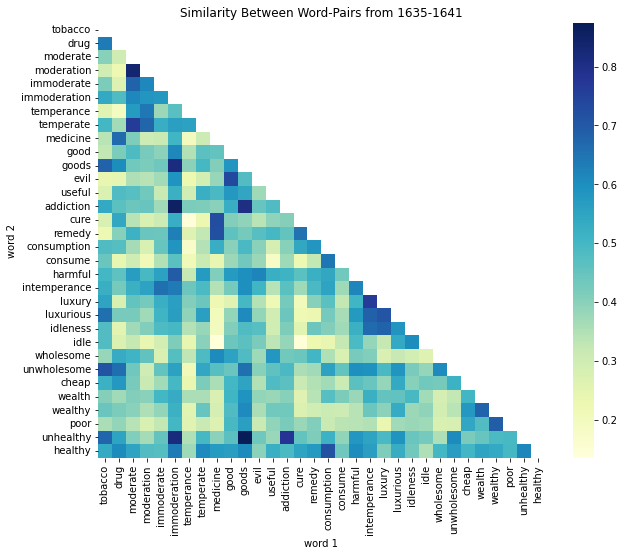

In [28]:
# lexicon = ['trade','power','evil','industry', 'savage', 'indian', 'spaniard', 'guyana', 'idleness']
# plot_heatmap(lexicon)
another = ['tobacco','drug','moderate','moderation','immoderate','immoderation','temperance',
            'temperate','medicine','good','goods','evil',
            'useful','addiction','cure','remedy','consumption','consume','harmful',
            'intemperance','luxury','luxurious','idleness','idle','wholesome','unwholesome','cheap','wealth',
            'wealthy','poor','unhealthy','healthy']
plot_heatmap(another)